# 1 Display Outputs

In [12]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

In [ ]:
moldict = pd.read_pickle('search.pkl')
truelist, falselist = moldict['true'], moldict['false']

In [17]:

for i in range(len(truelist)):
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(m) for m in truelist[i]],
                            molsPerRow=len(truelist[i]),    
                            subImgSize=(300,300),
                            legends=truelist[i], 
                            returnPNG=False
                            )
    img.save(f'{i}.png')

In [20]:

# 2. 绘制
for i in range(len(falselist)):
    # try: [Chem.MolFromSmiles(m) for m in falselist[i]]
    # except: falselist[i][0] == '[X]'
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(m) for m in falselist[i]],
                            molsPerRow=len(falselist[i]),      # 每行几列
                            subImgSize=(300,300),
                            legends=falselist[i],  # 图例
                            returnPNG=False
                            )
    img.save(f'{i}.png')

[08:54:35] SMILES Parse Error: extra open parentheses while parsing: CC(C)(C)OC(=O)Oc1ccc(C(C)(C)C
[08:54:35] SMILES Parse Error: check for mistakes around position 21:
[08:54:35] CC(C)(C)OC(=O)Oc1ccc(C(C)(C)C
[08:54:35] ~~~~~~~~~~~~~~~~~~~~^
[08:54:35] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)OC(=O)Oc1ccc(C(C)(C)C' for input: 'CC(C)(C)OC(=O)Oc1ccc(C(C)(C)C'


# 2 Greedy Decode

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch, os

Text(0, 0.5, 'Recall')

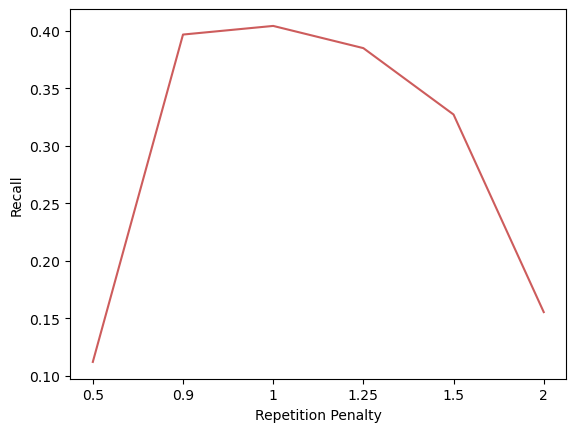

In [7]:
rep_pen_dict = {
    '0.5':0.1122,
    '0.9':0.3967,
    '1':0.4042,
    '1.25':0.3849,
    '1.5':0.3272,
    '2':0.1555
}
rep_pen = list(rep_pen_dict.keys())
recall = list(rep_pen_dict.values())
plt.plot(rep_pen, recall, c='indianred')
plt.xlabel('Repetition Penalty')
plt.ylabel('Recall')

# 3 Beam Search

In [5]:
data = torch.load('beamsearch.pt')
temps = [1, 1.5, 2]
beamsizes = [3,5,7,9]

/tmp/ipykernel_2453308/445999302.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('beamsearch.pt')


In [6]:
data

[np.float64(0.30890179003386553),
 np.float64(0.14876632801161102),
 np.float64(0.09917755200774069),
 np.float64(0.07232704402515723),
 np.float64(0.0613933236574746),
 np.float64(0.05075794226737623),
 np.float64(0.042573778422835024),
 np.float64(0.03828011611030479),
 np.float64(0.03442993065634575),
 np.float64(0.03018867924528302),
 np.float64(0.027708140915688087),
 np.float64(0.025278180938558298)]